# Predicting Credit Card Fraud

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
%pwd

'/Users/yahuiliu/Desktop'

In [3]:
df = pd.read_csv("/Users/yahuiliu/Desktop/creditcard.csv")

In [4]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

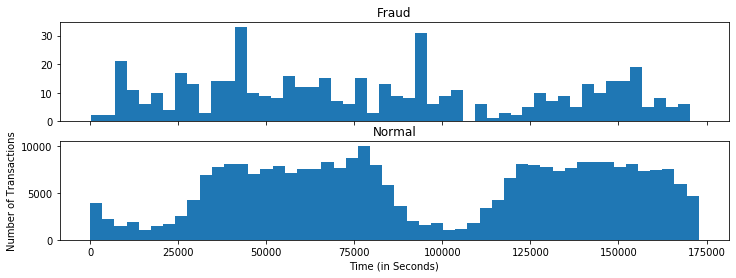

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

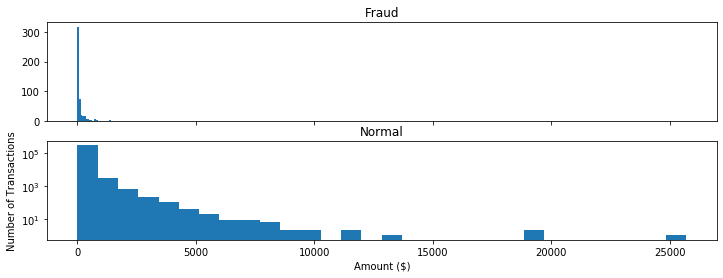

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

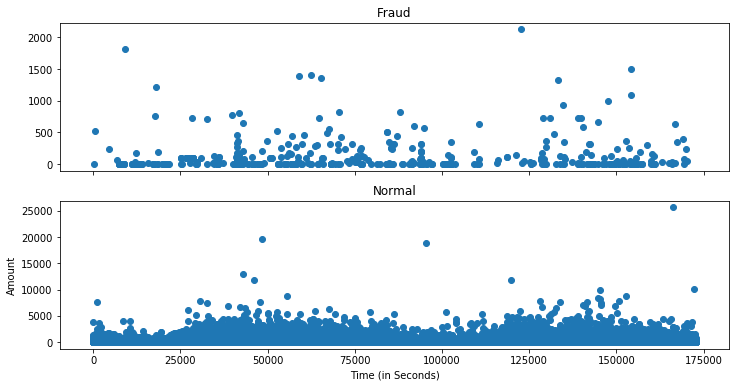

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [9]:
v_features = df.iloc[:,1:29].columns

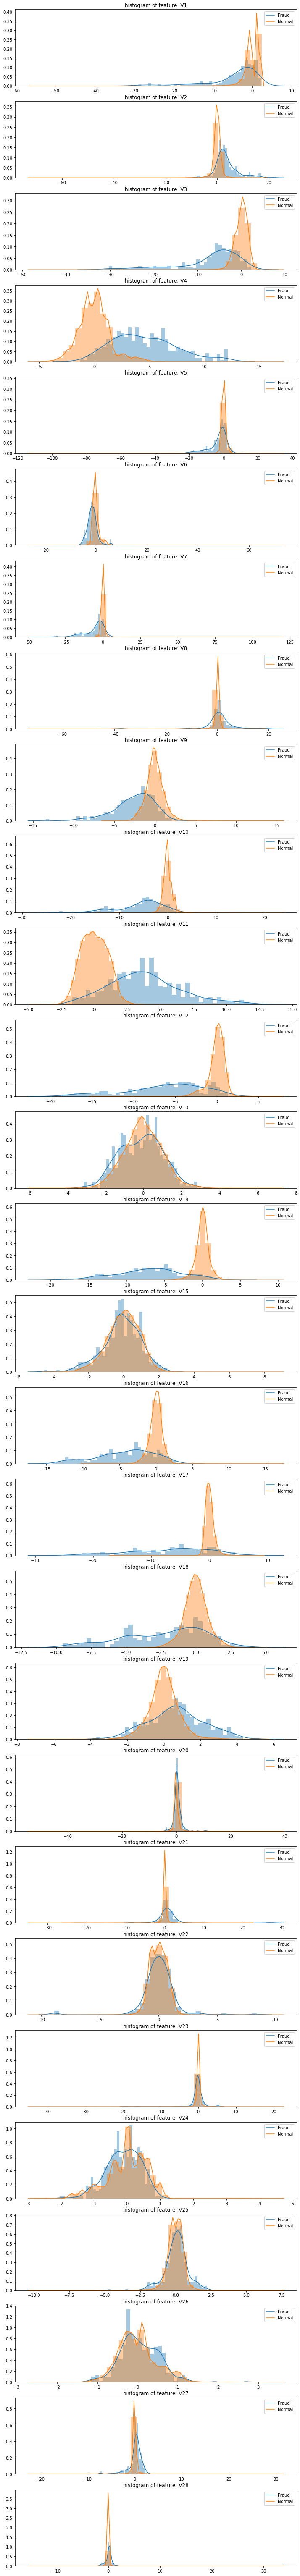

In [10]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1],kde_kws={"label":"Fraud"}, bins=40)
    sns.distplot(df[cn][df.Class == 0],kde_kws={"label":"Normal"}, bins=40)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [11]:
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V21','V15','V13','V8','V7','V6','V5'], axis =1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V9      284807 non-null  float64
 6   V10     284807 non-null  float64
 7   V11     284807 non-null  float64
 8   V12     284807 non-null  float64
 9   V14     284807 non-null  float64
 10  V16     284807 non-null  float64
 11  V17     284807 non-null  float64
 12  V18     284807 non-null  float64
 13  V19     284807 non-null  float64
 14  Amount  284807 non-null  float64
 15  Class   284807 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 34.8 MB


In [13]:
df = df[df['Amount']<=2200]

In [35]:
Y = df["Class"]
X = df.drop(["Class"],axis = 1)

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)#划分数据集

In [45]:
y_test.sum()

133

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
forest = RandomForestClassifier(n_jobs = -1,bootstrap = True,n_estimators=20)

In [48]:
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [49]:
forest.score(X_test,Y_test)

0.9996364574537949

In [50]:
Y_pre = forest.predict(X_test)

In [51]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [52]:
f1_score(Y_test,Y_pre)

0.8734693877551021

In [53]:
precision_score(Y_test,Y_pre)

0.9553571428571429

In [54]:
recall_score(Y_test,Y_pre)

0.8045112781954887

In [55]:
Y_pre.sum()

112

In [56]:
Y_test

284461    0
622       0
52214     0
84103     0
64245     0
         ..
105786    0
169431    0
170646    0
24486     0
37378     0
Name: Class, Length: 85272, dtype: int64

In [57]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':[10,20,50,100,150,200]}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(), 
                       param_grid = param_test1, scoring='f1',cv=6)
gsearch1.fit(X_train,Y_train)
print( gsearch1.best_params_, gsearch1.best_score_)


{'n_estimators': 200} 0.8494011590953686


In [58]:
param_test2 = {'max_depth':[1,2,3,5,7,9,11,13]}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=200),
                        param_grid = param_test2, 
                        scoring='f1',
                        cv=6)
gsearch2.fit(X_train,Y_train)
print( gsearch2.best_params_, gsearch2.best_score_)


{'max_depth': 13} 0.8528289805819265


In [59]:
param_test3 = {'min_samples_split':[80,100,120,140], 'min_samples_leaf':[10,20,30,40,50,100]}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 200, max_depth=13),
                        param_grid = param_test3, 
                        scoring='f1', 
                        cv=6)
gsearch3.fit(X_train,Y_train)
print( gsearch3.best_params_, gsearch3.best_score_)


KeyboardInterrupt: 

In [157]:
param_test4 = {'max_features':[3,5,7,9,11]}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 100, max_depth=3, min_samples_split=80,
                                  min_samples_leaf=10),
                        param_grid = param_test4,
                        scoring='f1',
                        cv=6)
gsearch4.fit(X_train,Y_train)
print( gsearch4.best_params_, gsearch4.best_score_)


{'max_features': 7} 0.7866967426175423


In [179]:
forest = RandomForestClassifier(n_jobs = -1,n_estimators=100, max_depth=3, min_samples_split=80,
                                  min_samples_leaf=10, max_features= 7)
forest.fit(X_train,Y_train)
Y_pre = forest.predict(X_test)
f1_score(Y_test,Y_pre)

0.6451612903225806